In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [ ]:
df=pd.read_csv("creditcard.csv")
df=df.drop(columns=['Time','Class','Amount'])
df=df.dropna(how='any')

In [ ]:

N = int(len(df))#number of transactions made
d = 28 # number of customers 
CT = [] 
NOT = [0] * d 
sums_of_rewards = [0] * d 
total_reward = 0
for n in range(0, N):
    t = 0
    max_upper_bound = 0
    for i in range(0, d):
        if (NOT[i] > 0): # following the formulae for exploiting the best ad during exploration of the ads in a short duration
            average_reward = sums_of_rewards[i] / NOT[i]
            delta_i = math.sqrt(3/2 * math.log(n + 1) / NOT[i])
            upper_bound = average_reward + delta_i
        else:
                upper_bound = 1e400 #setting a limit for a particular bound
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    CT.append(t)
    NOT[t] = NOT[t] + 1
    reward = df.values[n, t]
    sums_of_rewards[t] = sums_of_rewards[t] + reward
    total_reward = total_reward + reward

Based on the below plot we can identify whether a person is a credit card fraud or not

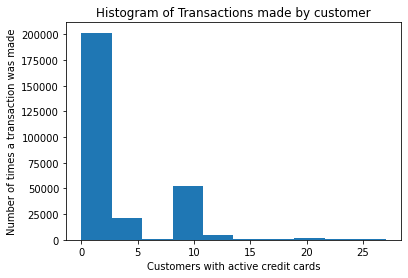

In [ ]:
plt.hist(ads_selected)
plt.title('Histogram of Transactions made by customer')
plt.xlabel('Customers with active credit cards')
plt.ylabel('Number of times a transaction was made')
plt.show()